In [1]:
import pandas as pd
import os

In [2]:
#Répertoire du fichier des données
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

In [3]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update']).assign(day=lambda _df:_df['Last Update'].dt.date))

In [4]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [5]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
day                       object
dtype: object

In [6]:
epidemie_df['Country/Region'].value_counts()

Mainland China                1517
US                            1055
Australia                      233
Canada                         151
China                           66
                              ... 
Viet Nam                         1
Hong Kong SAR                    1
Iran (Islamic Republic of)       1
Republic of Moldova              1
Russian Federation               1
Name: Country/Region, Length: 145, dtype: int64

# Epidémie en France

In [7]:
! pip install seaborn

In [8]:
import seaborn as sns

sns.set() #afficher les graphiques avec le look de Seaborn

In [9]:
%matplotlib inline

In [33]:
epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')].sort_values('day', ascending=False)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
4723,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-11-2020.csv,2020-03-11
4939,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-12-2020.csv,2020-03-11


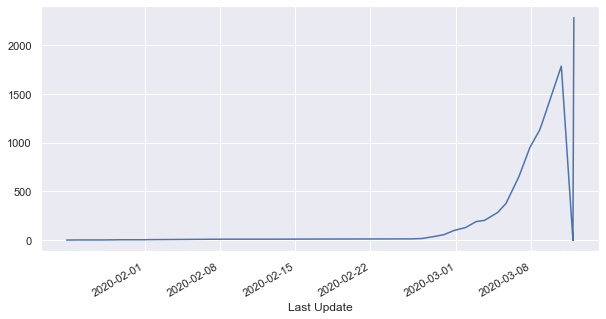

In [11]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

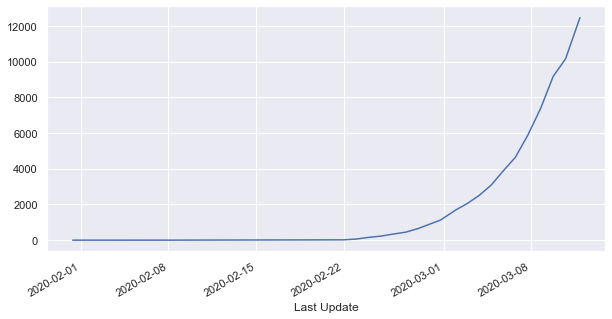

In [12]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('Last Update')['Confirmed'].plot(figsize=(10,5));

In [34]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
                          .drop_duplicates(subset=['Province/State', 'day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed': 'sum', 'Deaths':'sum', 'Recovered':'sum'})
             .reset_index()
            )
                          

In [35]:
france_df.head(), france_df.tail()

(  Country/Region         day  Confirmed  Deaths  Recovered
 0         France  2020-01-24        2.0     0.0        0.0
 1         France  2020-01-25        3.0     0.0        0.0
 2         France  2020-01-26        3.0     0.0        0.0
 3         France  2020-01-27        3.0     0.0        0.0
 4         France  2020-01-28        4.0     0.0        0.0,
    Country/Region         day  Confirmed  Deaths  Recovered
 23         France  2020-03-07      949.0    11.0       12.0
 24         France  2020-03-08     1126.0    19.0       12.0
 25         France  2020-03-09     1209.0    19.0       12.0
 26         France  2020-03-10     1784.0    33.0       12.0
 27         France  2020-03-11     2284.0    48.0       12.0)

In [ ]:
france_df.set_index('day')['Confirmed']

In [ ]:
(epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')]
 .set_index

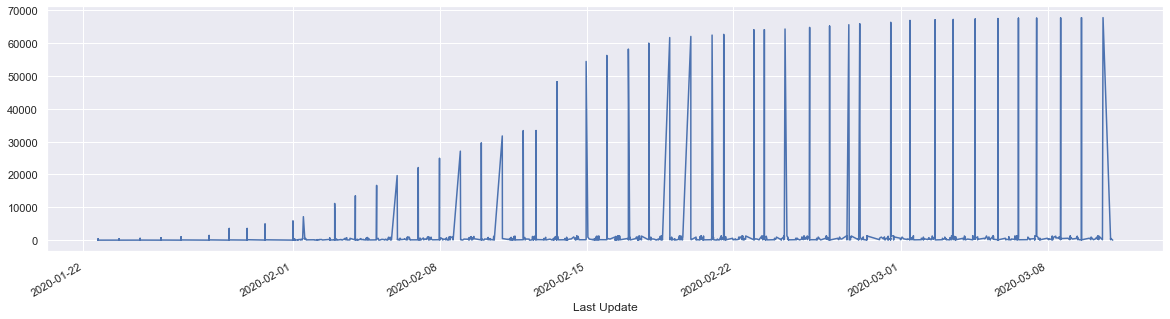

In [13]:
epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].set_index('Last Update')['Confirmed'].plot(figsize=(20,5));

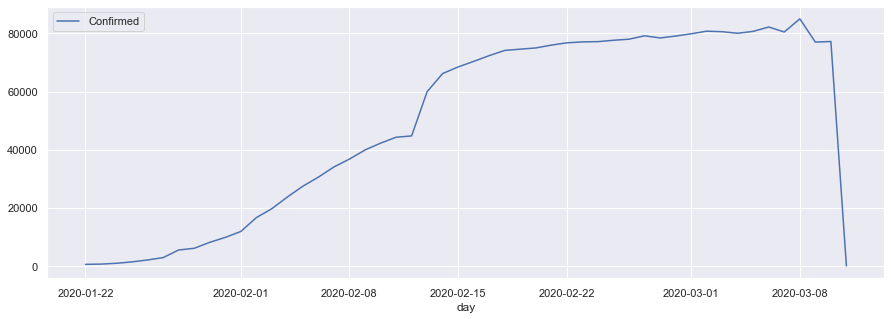

In [14]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China'].groupby('day').agg({'Confirmed': 'sum'})).plot(figsize=(15,5));

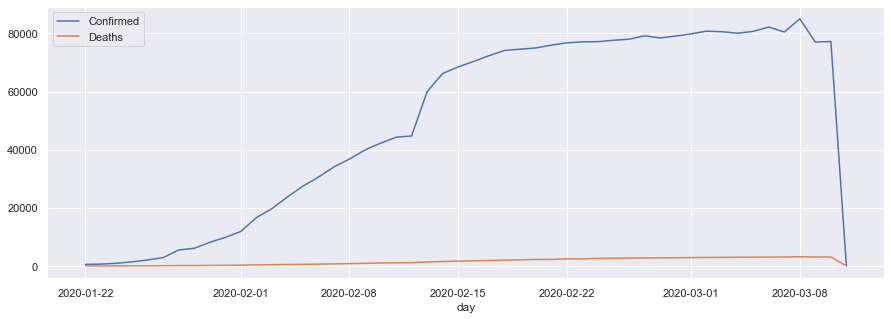

In [15]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day').agg({'Confirmed': 'sum', 'Deaths' : 'sum'})).plot(figsize=(15,5));

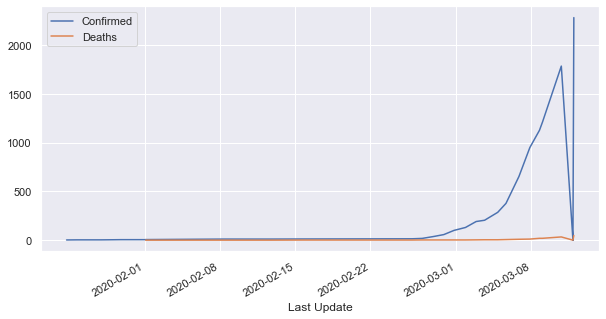

In [16]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('Last Update')[['Confirmed', 'Deaths']].plot(figsize=(10,5));

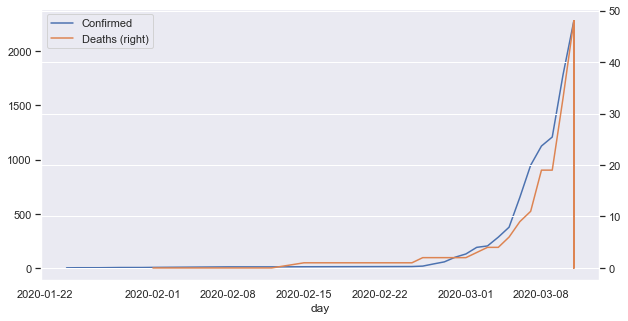

In [17]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Deaths'] ]
    .plot(secondary_y=['Deaths'], figsize=(10, 5))
);

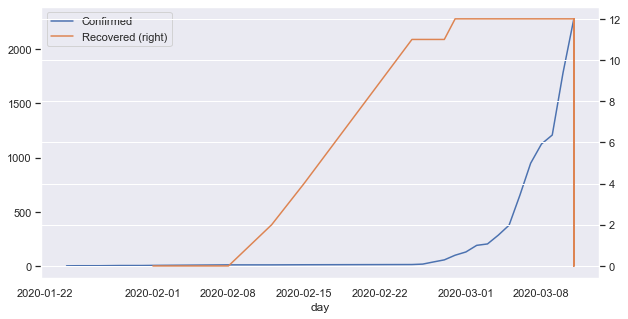

In [18]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
    .set_index('day')[ ['Confirmed', 'Recovered'] ]
    .plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [19]:
china_df = (epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
            .groupby('day')
            .agg({'Confirmed' : 'sum', 'Deaths' : 'sum' , 'Recovered' : 'sum'})
           )

In [20]:
china_df.head()

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0


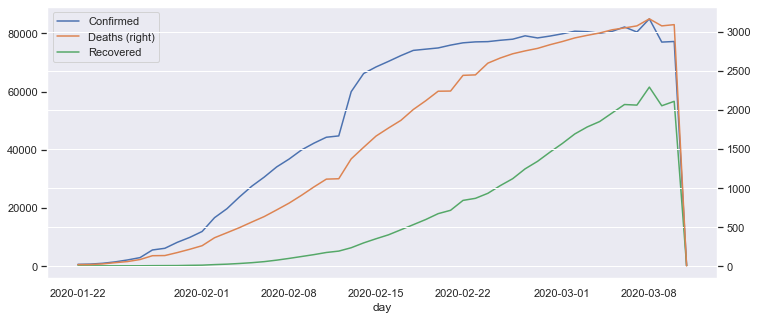

In [21]:
china_df.plot(secondary_y=['Deaths'], figsize=(12,5));

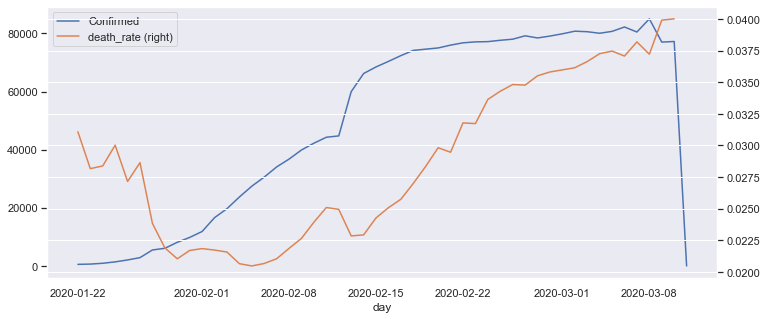

In [22]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])[['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'], figsize=(12,5))
);

In [23]:
EUROPE = [ 'France','Germany','UK','Spain']

In [24]:
import matplotlib.pyplot as plt

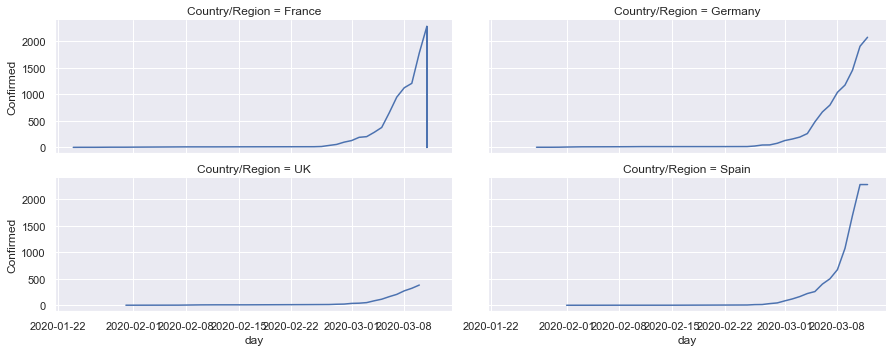

In [25]:
g= sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                col='Country/Region', col_wrap=2, height=2.5, aspect=2.5)
g =g.map(plt.plot, "day", "Confirmed")

In [26]:
#conda install -c plotly chart-studio

#import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot

In [27]:
france_df = epidemie_df[epidemie_df['Country/Region'] == 'France']

In [28]:
import plotly.offline as py
import plotly.graph_objs as go

In [36]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                  ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                  )
       ]

layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig)

In [30]:
py.iplot(data)

In [31]:
data

[Scatter({
     'name': 'Confirmés/France',
     'x': array([datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
                 datetime.date(2020, 1, 26), datetime.date(2020, 1, 27),
                 datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
                 datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 1),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 1),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 1),
                 datetime.date(2020, 2, 1), datetime.date(2020, 2, 8),
                 datetime.date(2020, 2, 8), datetime.date(2020, 2, 8),
                 datetime.date(2020, 2, 8), datetime.date(2020, 2, 12),
                 datetime.date(2020, 2, 12), datetime.date(2020, 2, 12),
                 datetime.date(2020, 2, 15), datetime.date(2020, 2, 15),
                 datetime.date(2020, 2, 15), datetime.date(2020, 2, 15),
                 d

In [ ]:
réfléchir à une visualisation
est ce qu'on peut trouver une info sur le nb de voyageurs dans les aéroports ?
Démographie
Modélisation de propogation d'épidémie en série chronologique (packages R)

In [41]:
import yaml

ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

In [42]:
params

{'directories': {'processed': '../data/processed/', 'raw': '../data/raw/'},
 'files': {'all': 'all_data.csv'}}